# Visualization of **Ambiguity Code Search** Results

# 1.&nbsp;Introduction

The **Ambiguity Code Search Database** is the result of an antibody discovery algorithm implemented by 
[Antanasijevic et. al, From structure to sequence: Antibody discovery using cryoEM, Science Advances, 2022](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC8769551/). 
 
Data used here is downloaded from resources from the above paper. Code Ocean (DOI:  [10.24433/CO.9600319.v1](https://codeocean.com/capsule/6661879/tree/v1)). We are going to look at some statistics regarding their results.    


*italicized text*# 2.&nbsp;Importing Data

There are two tables in the Code Ocean platform: `33172_lc_codeocean.csv` and `33172__IgL.tsv`. First, these tables are imported into mySQL using the script `import.sql`:



```sql
drop database if exists AmbiguityCodeSearch;
create database AmbiguityCodeSearch;
use AmbiguityCodeSearch;

drop table if exists codeocean;
create table codeocean (
id INT AUTO_INCREMENT,
hit_name VARCHAR(255) NOT NULL,
hit_seq VARCHAR(255) NOT NULL,
fw1_hit_score DECIMAL(20 , 19) NOT NULL,
fw1_hit_short BOOLEAN NOT NULL,
fw1_hit_raw VARCHAR(255) NOT NULL,
fw1_hit_align VARCHAR(255) NOT NULL,
fw1_hit_loc INT NOT NULL,
fw1_hit_pos VARCHAR(255) NOT NULL,
cdr1_hit_score DECIMAL(20 , 19) NOT NULL,
cdr1_hit_short BOOLEAN NOT NULL,
cdr1_hit_raw VARCHAR(255) NOT NULL,
cdr1_hit_align VARCHAR(255) NOT NULL,
cdr1_hit_loc INT NOT NULL,
cdr1_hit_pos VARCHAR(255) NOT NULL,
fw2_hit_score DECIMAL(20 , 19) NOT NULL,
fw2_hit_short BOOLEAN NOT NULL,
fw2_hit_raw VARCHAR(255) NOT NULL,
fw2_hit_align VARCHAR(255) NOT NULL,
fw2_hit_loc INT NOT NULL,
fw2_hit_pos VARCHAR(255) NOT NULL,
cdr2_hit_score DECIMAL(20 , 19) NOT NULL,
cdr2_hit_short BOOLEAN NOT NULL,
cdr2_hit_raw VARCHAR(255) NOT NULL,
cdr2_hit_align VARCHAR(255) NOT NULL,
cdr2_hit_loc INT NOT NULL,
cdr2_hit_pos VARCHAR(255) NOT NULL,
fw3_hit_score DECIMAL(20 , 19) NOT NULL,
fw3_hit_short BOOLEAN NOT NULL,
fw3_hit_raw VARCHAR(255) NOT NULL,
fw3_hit_align VARCHAR(255) NOT NULL,
fw3_hit_loc INT NOT NULL,
fw3_hit_pos VARCHAR(255) NOT NULL,
cdr3_hit_score DECIMAL(20 , 19) NOT NULL,
cdr3_hit_short BOOLEAN NOT NULL,
cdr3_hit_raw VARCHAR(255) NOT NULL,
cdr3_hit_align VARCHAR(255) NOT NULL,
cdr3_hit_loc INT NOT NULL,
cdr3_hit_pos VARCHAR(255) NOT NULL,
primary key (id)
)

/*
Modify the following line for correct file path on your computer
*/
 load data local infile '/Users/amirmanzour/Documents/GitHub/AmbiguityCodeSearch/33172_lc_codeocean.csv' 
 into table codeocean 
 FIELDS TERMINATED BY ',' LINES TERMINATED BY '\n' 
 IGNORE 1 LINES
 (hit_name,hit_seq,fw1_hit_score,@fw1_hit_short,fw1_hit_raw,fw1_hit_align,fw1_hit_loc,fw1_hit_pos,cdr1_hit_score,@cdr1_hit_short,cdr1_hit_raw,cdr1_hit_align,cdr1_hit_loc,cdr1_hit_pos,fw2_hit_score,@fw2_hit_short,fw2_hit_raw,fw2_hit_align,fw2_hit_loc,fw2_hit_pos,cdr2_hit_score,@cdr2_hit_short,cdr2_hit_raw,cdr2_hit_align,cdr2_hit_loc,cdr2_hit_pos,fw3_hit_score,@fw3_hit_short,fw3_hit_raw,fw3_hit_align,fw3_hit_loc,fw3_hit_pos,cdr3_hit_score,@cdr3_hit_short,cdr3_hit_raw,cdr3_hit_align,cdr3_hit_loc,cdr3_hit_pos) 
 set fw1_hit_short = (@fw1_hit_short = 'True'), 
 cdr1_hit_short = (@cdr1_hit_short = 'True'), 
fw2_hit_short = (@fw2_hit_short = 'True'), 
cdr2_hit_short = (@cdr2_hit_short = 'True'), 
fw3_hit_short = (@fw3_hit_short = 'True'), 
cdr3_hit_short = (@cdr3_hit_short = 'True');

drop table if exists lgl;
create table lgl (
id INT AUTO_INCREMENT,
sequence_id VARCHAR(255) NOT NULL,
sequence VARCHAR(1000) NOT NULL,
locus VARCHAR(50) NOT NULL,
primary key (id)
)

/*
Modify the following line for correct file path on your computer
*/
load data local infile '/Users/amirmanzour/Documents/GitHub/AmbiguityCodeSearch/33172__IgL.tsv' 
 into table lgl 
 FIELDS TERMINATED BY '\t' LINES TERMINATED BY '\n' 
 IGNORE 1 LINES
 (sequence_id,sequence,locus,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy,@dummy)
```

After importing the tables, we take a closer look at colums `Fw1_hit_score1` and `Fw2_hit_score1`, which reflect scores corrsponding to `Fw1` and `Fw2` regions, respectively.

Histograms of both features are illustrated using Tableau along with curves that best estimate their distribution, under normality assumption: 

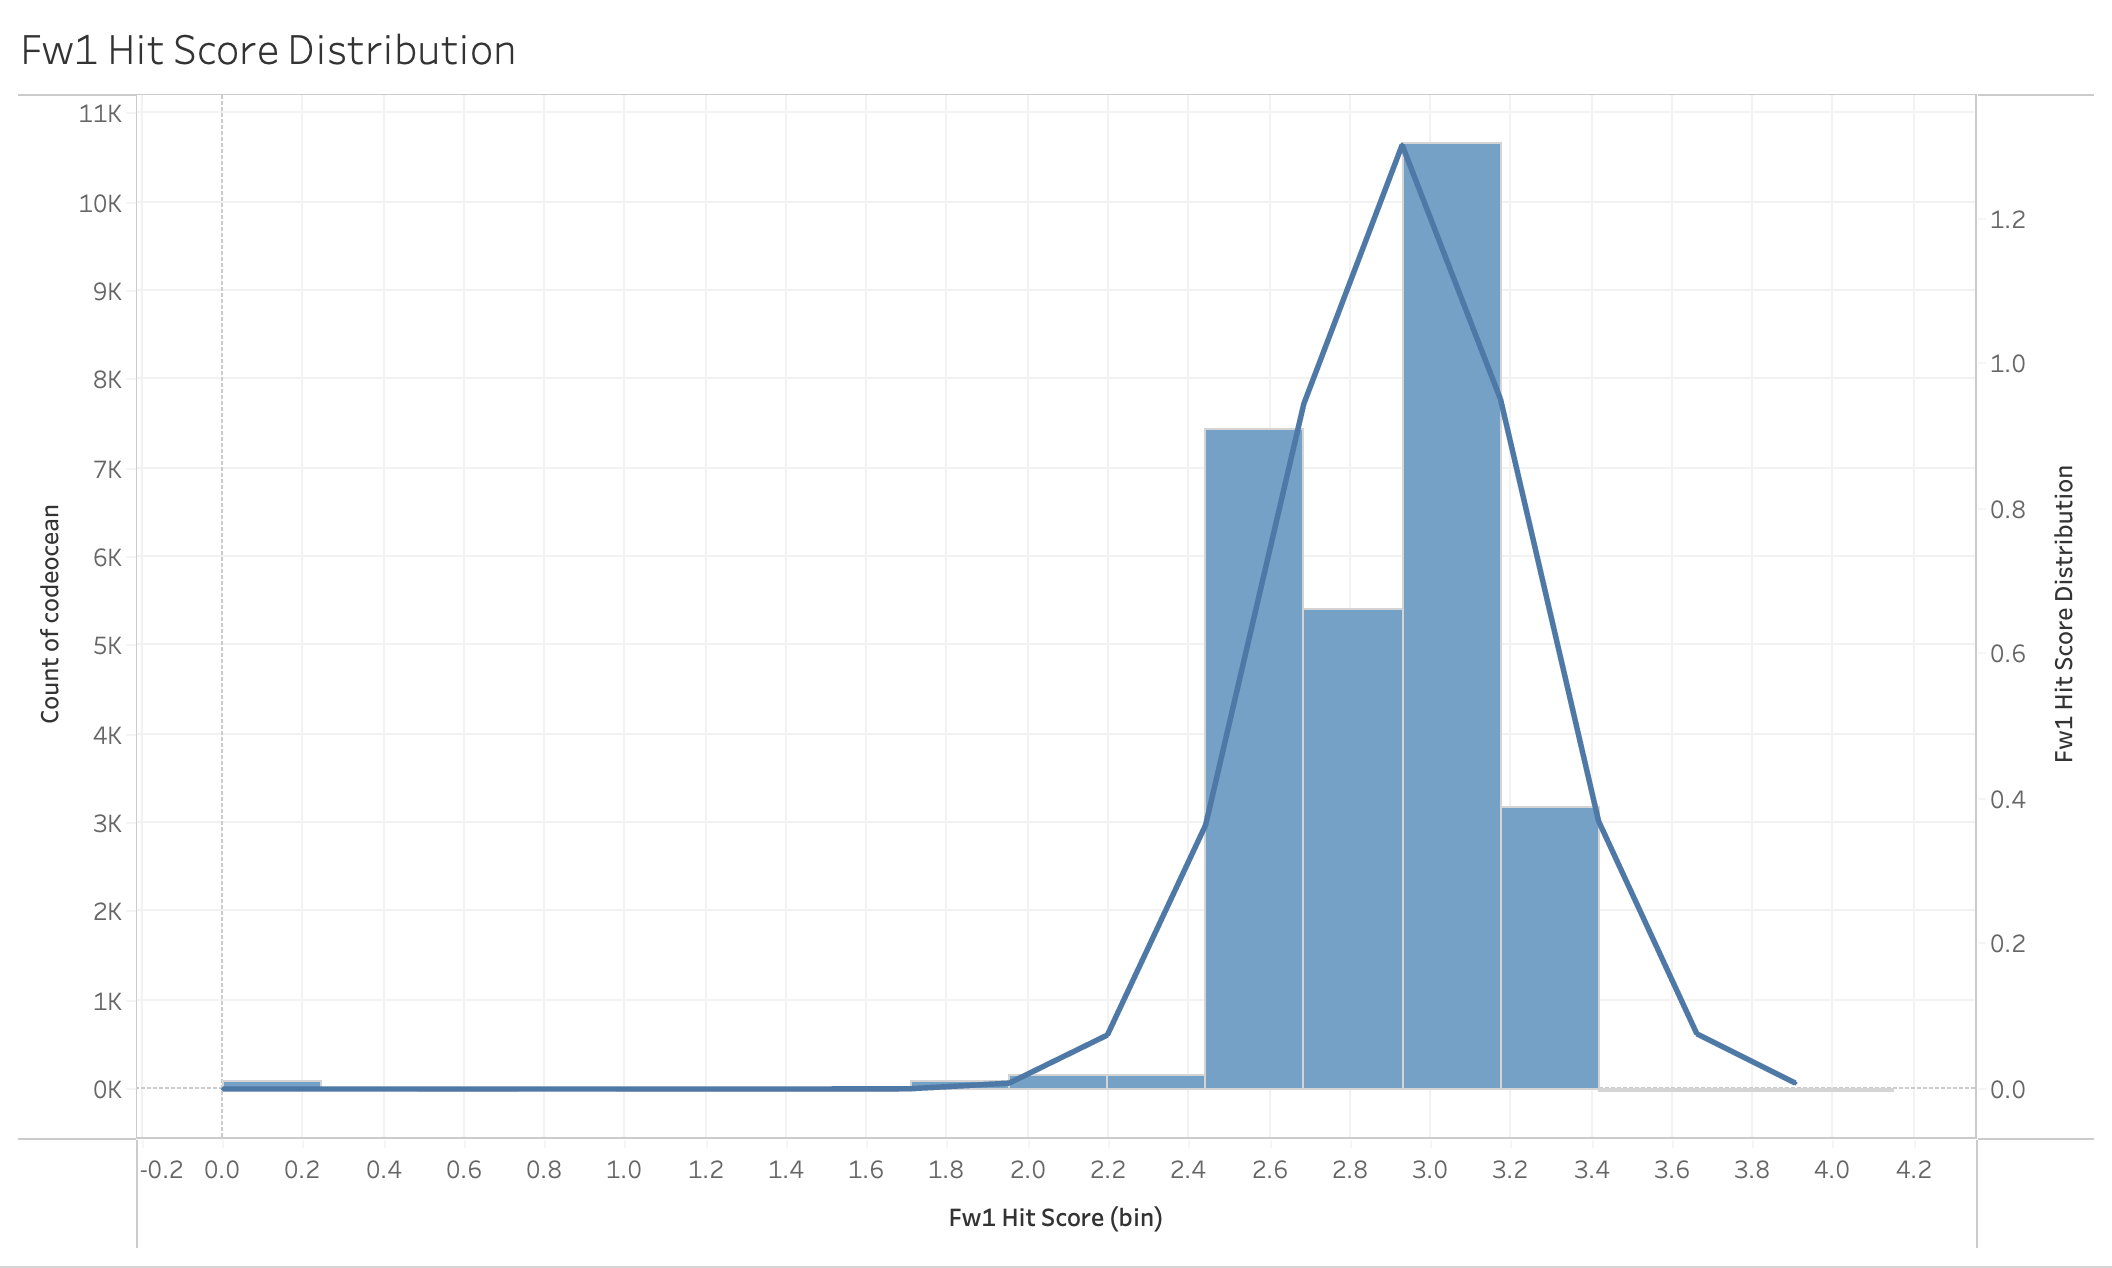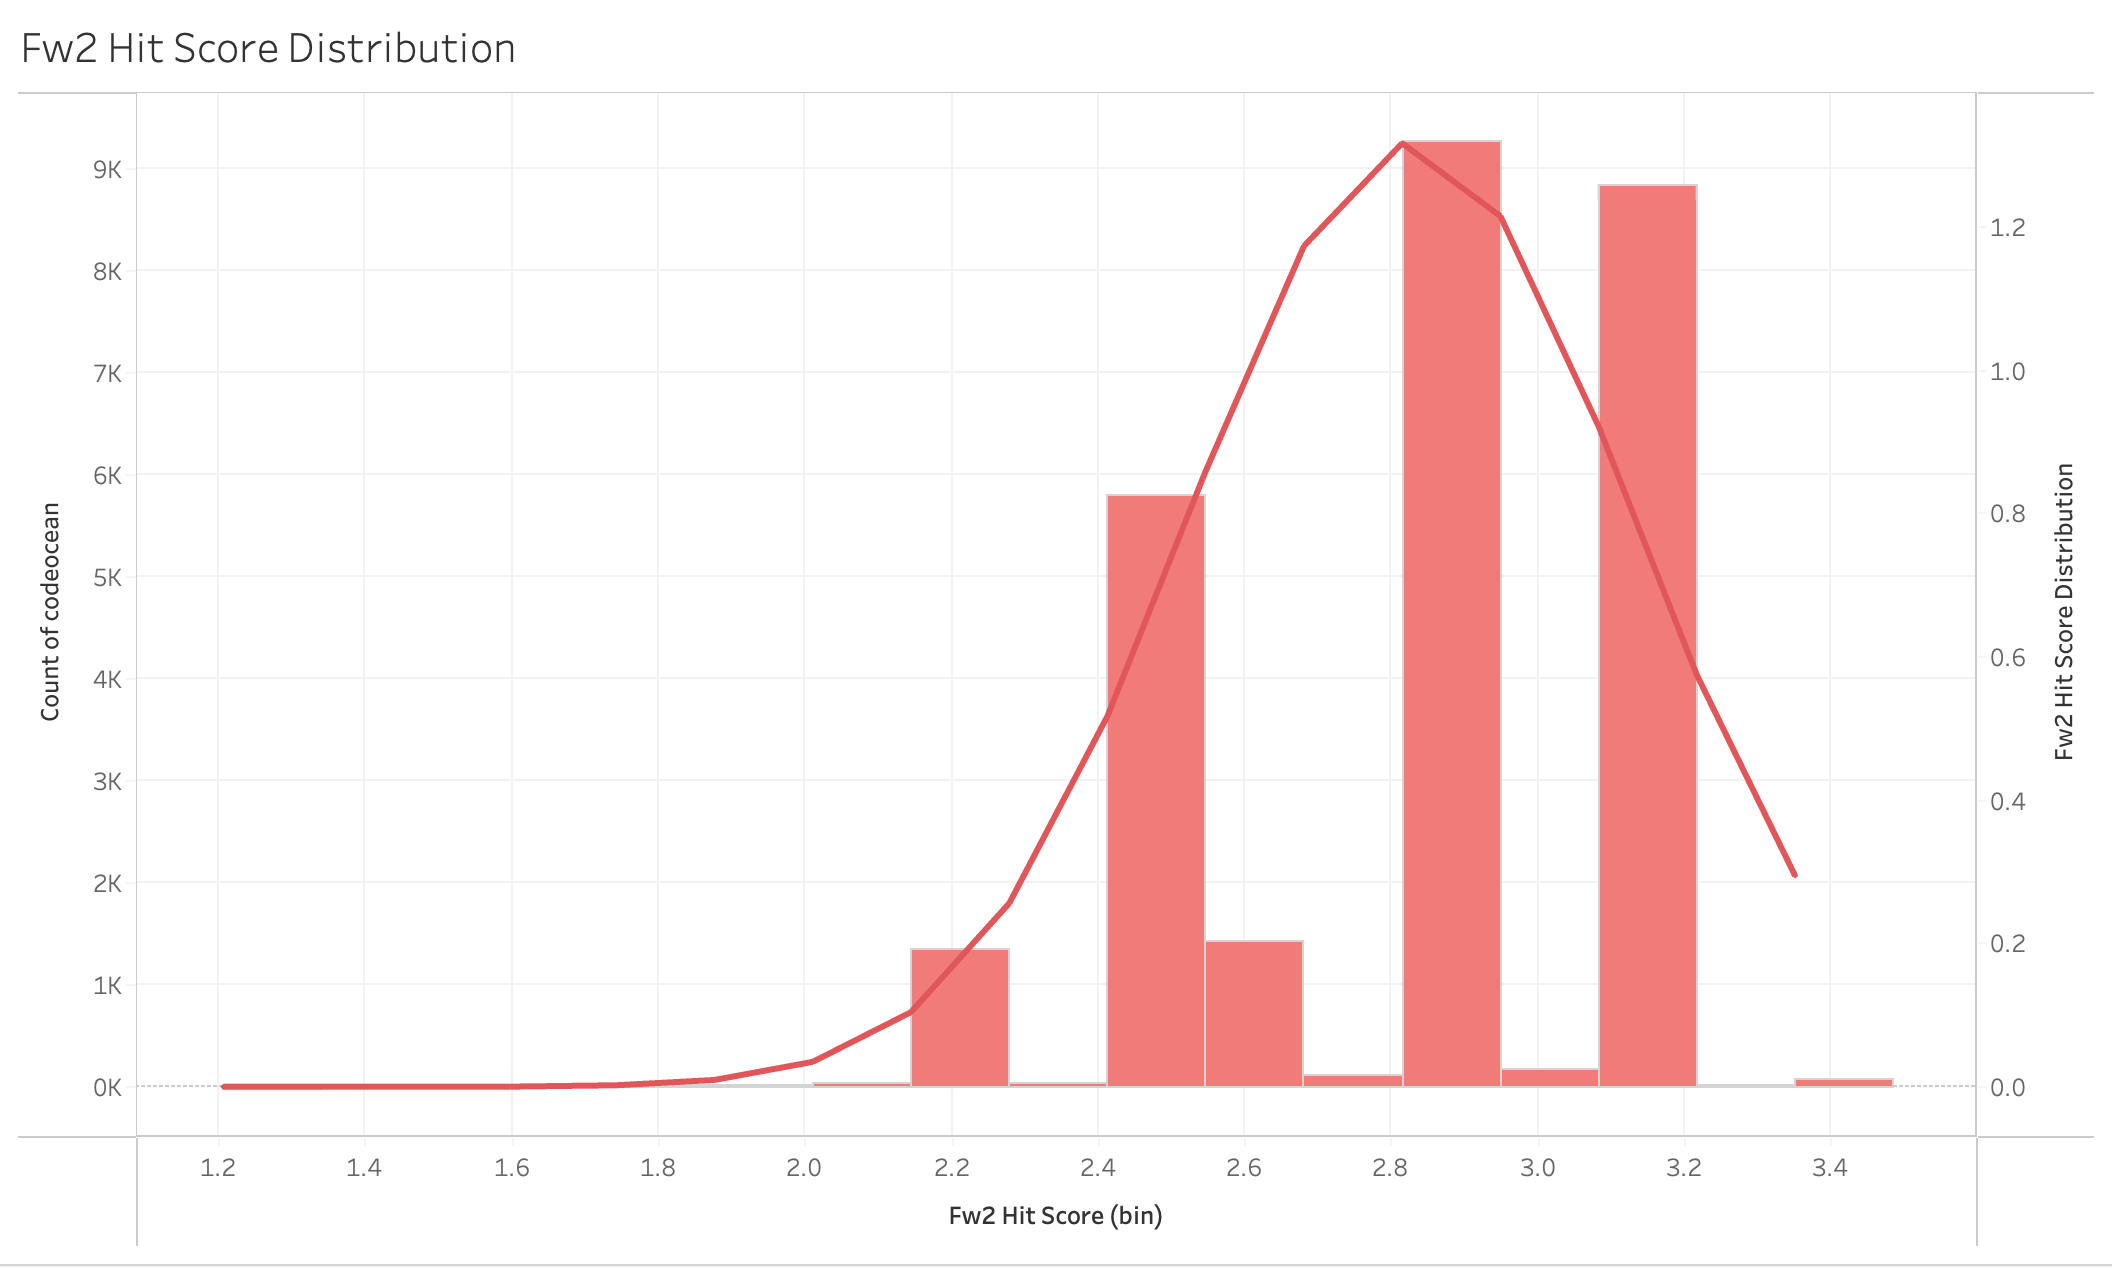


Total number of hits (records) in the `codeocean` table was `27224`. Given boolean features `Cdr1`, `Cdr1`, and `Cdr2`, number of hits that fell within each combinatio of features are as follows:


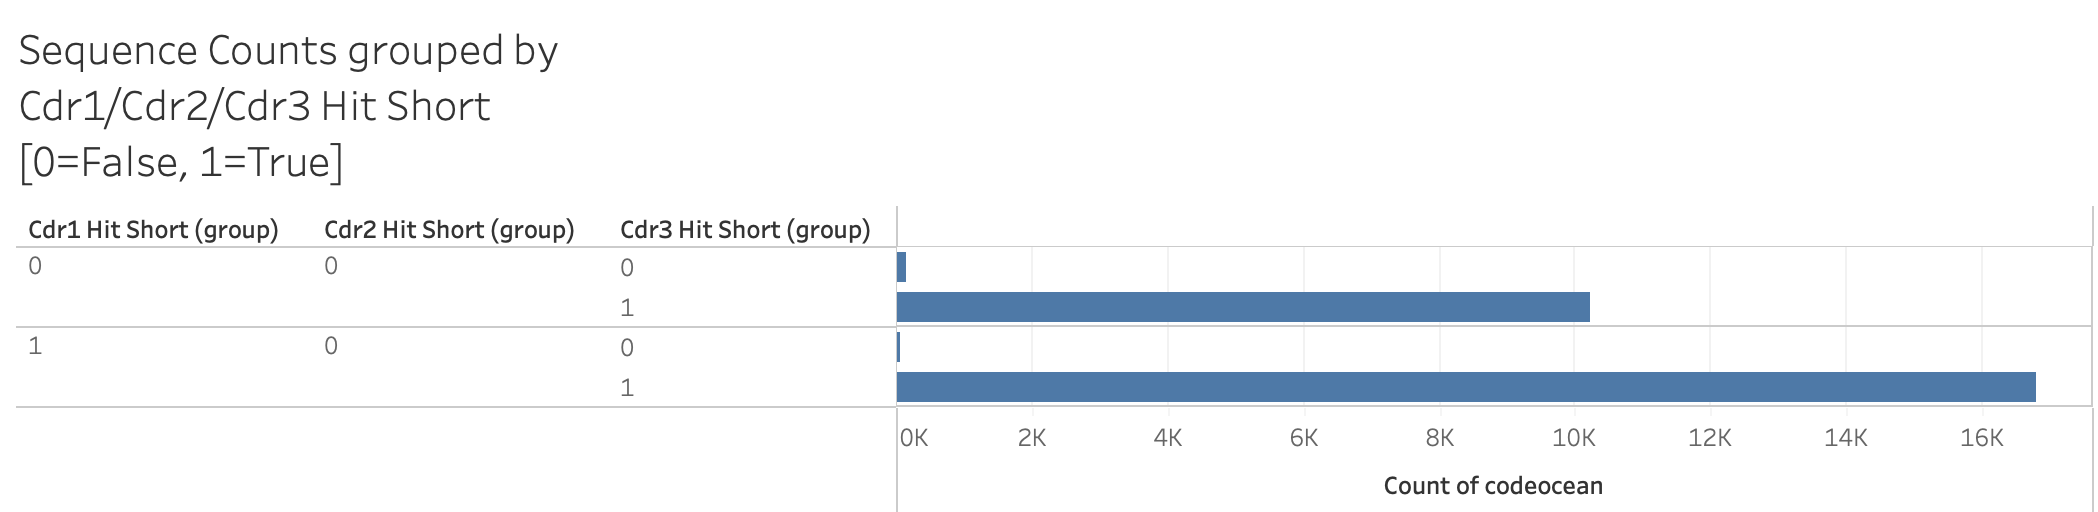

Next, we quantify the hydrophobicity of regions by considering their amino-acid sequences. In doing so, we measure the ratio of hydrophobic amino acids (A,V,L,I,P,F,C) to total amino acids in the sequence. Note, this measure does not necessarily reflect the actual hydrophobicity and mostly computed for illustratio purposes. We create a SQL stored function `ishydrophobic`:

```sql
DELIMITER //
CREATE FUNCTION ISHYDROPHOBIC(sequence VARCHAR(1000))
  RETURNS DECIMAL(3,2) DETERMINISTIC
  BEGIN
  DECLARE A INT;
  DECLARE V INT;
  DECLARE L INT;
  DECLARE I INT;
  DECLARE P INT;
  DECLARE F INT;
  DECLARE C INT;
  SET A = CHAR_LENGTH(sequence) - CHAR_LENGTH( REPLACE ( sequence, 'A', ''));
  SET V = CHAR_LENGTH(sequence) - CHAR_LENGTH( REPLACE ( sequence, 'V', ''));
  SET L = CHAR_LENGTH(sequence) - CHAR_LENGTH( REPLACE ( sequence, 'L', ''));
  SET I = CHAR_LENGTH(sequence) - CHAR_LENGTH( REPLACE ( sequence, 'I', ''));  
  SET P = CHAR_LENGTH(sequence) - CHAR_LENGTH( REPLACE ( sequence, 'P', ''));  
  SET F = CHAR_LENGTH(sequence) - CHAR_LENGTH( REPLACE ( sequence, 'F', ''));  
  SET C = CHAR_LENGTH(sequence) - CHAR_LENGTH( REPLACE ( sequence, 'C', ''));
  --adding 1 to avoid division by zero error
  RETURN (CHAR_LENGTH(sequence) - A - V - L - I - P - F - C)/(CHAR_LENGTH(sequence) + 1);
  END //
```

For instance, we can use the function to compute the hydropobicity of the `Fw1` region corresponding to the frist five records:
```sql
select id,fw1_hit_raw,ishydrophobic(fw1_hit_raw) from codeocean limit 5
```


| id | fw1_hit_raw |ishydrophobic(fw1_hit_raw)|
| --- | --- | --- |
| <font color='black'>1</font> | <font color='black'>QSVLTQPPSVSGAPDQRVTISCTGS</font>| <font color='red'>0.58</font> | 
| <font color='black'>2</font> | <font color='black'>TWGAPGQRVTISCTGN </font>| <font color='red'>0.65</font> |
| <font color='black'>3</font> | <font color='black'>HGTISCSGS </font>| <font color='red'>0.70</font> |
| <font color='black'>4</font> | <font color='black'>SYDLTQARSVSVSPGQTARITCGGD </font>| <font color='red'>0.65</font> |
| <font color='black'>5</font> | <font color='black'>QSVLTQPPSVSGAPGQRVTISCTGS </font>| <font color='red'>0.58</font> |

# 4.&nbsp;Extraction of hydrophobic sequences using recursive SQL

Common Table Expressions (CTE) are useful tools in SQL with many interesting applications. Here, we show an example of application of a recursive CTE that extracts sequences with high hydrophobicity. Note that extracting such sequences can be done through a veriety of techniques such as binning, sorting, etc... A recursive implementation by no means is optimal and is only done for illustrtion purposes. Devising a recursive structure, however, helps construct less trivial queries from the database.

Now, let say we want to identify sequences with high hydrophobicity. In addition, we want to find hydrophobic sequences one by one such that each sequence has less hydrophobicity value than previous one. Search terminates where the hydrophobicity of the next sequence falls below a threshold distance of `0.05` with the previous one. In other words, we are only interested in sets of sequences that show *gradual* decrease in hydrophobicity.

```sql
--value n is used to control the recursion limiting it to a maximum of five sequences
with recursive hydrophobic(n,id,sequence,hydrophobicity) as
--this select statement is the base case containing only the sequence with maximum hydrophobicity
(select 1 as n,id,fw1_hit_raw as sequence, ISHYDROPHOBIC(fw1_hit_raw) as hydrophobicity from codeocean where ISHYDROPHOBIC(fw1_hit_raw) in 
(select max(ISHYDROPHOBIC(fw1_hit_raw)) from codeocean)
union all
select n+1,codeocean.id,codeocean.fw1_hit_raw as sequence,ISHYDROPHOBIC(codeocean.fw1_hit_raw) as hydrophobicity from codeocean inner join hydrophobic as h
on ISHYDROPHOBIC(codeocean.fw1_hit_raw) < h.hydrophobicity
and ISHYDROPHOBIC(codeocean.fw1_hit_raw) > (h.hydrophobicity - 0.05)
and codeocean.id != h.id
and n < 5
)
select * from hydrophobic

```

| n | id |sequence|hydrophobicity|
| --- | --- | --- | --- |
| <font color='black'>1</font> | <font color='black'>26335 </font>| <font color='black'>HGGGD</font> |  <font color='black'>0.83</font>|
| <font color='black'>2</font> | <font color='black'>13024 </font>| <font color='black'>HGTISWSGS</font> |  <font color='black'>0.80</font>|

Script `analyze.sql` contains both the function and recursive CTE commands.